In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Create a dataframe with certain dependence and some random error

In [2]:
n_rows = 1000
df = pd.DataFrame()
df['x_col1'] = np.random.randint(0,60,n_rows)
df['x_col2'] = np.random.randint(0,60,n_rows)
df['x_col3'] = np.random.randint(0,60,n_rows)
# df['x_intercept'] = np.ones(100)

df['y_col'] = np.round(5*df['x_col1'] + 2*df['x_col2'] - 3*df['x_col3'] + 6 + np.random.randn(n_rows))
df

,x_col1,x_col2,x_col3,y_col
0,31,0,49,16.0
1,33,6,32,85.0
2,50,37,47,188.0
3,30,38,36,125.0
4,26,2,4,129.0
...,...,...,...,...
995,58,22,6,321.0
996,3,59,37,28.0
997,24,14,14,113.0
998,52,50,16,317.0


### y variable against each of x variables

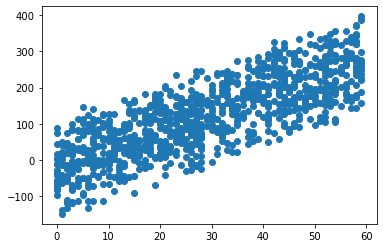

In [3]:
plt.scatter(df['x_col1'], df['y_col'])

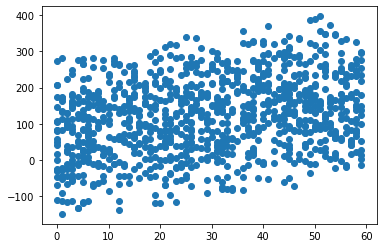

In [4]:
plt.scatter(df['x_col2'], df['y_col'])

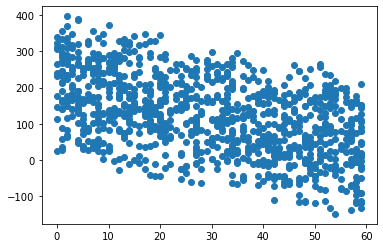

In [5]:
plt.scatter(df['x_col3'], df['y_col'])

### Linear Correlations

In [6]:
cov1 = np.cov(df['x_col1'], df['y_col'])
corr1 = cov1[0][1]/np.sqrt(cov1[0][0]*cov1[1][1])
corr1

0.8050063251450487

In [7]:
cov2 = np.cov(df['x_col2'], df['y_col'])
corr2 = cov2[0][1]/np.sqrt(cov2[0][0]*cov2[1][1])
corr2

0.2815502471449196

In [8]:
cov3 = np.cov(df['x_col3'], df['y_col'])
corr3 = cov3[0][1]/np.sqrt(cov3[0][0]*cov3[1][1])
corr3

-0.4964932802257122

### Regression

In [15]:
class StageWise_Forward():
    def __init__(self, eps = 0.1, n_iters = 1000):
        self.eps = eps
        self.n_iters = n_iters
        
    def get_corr(self, x,y):
        cov = np.cov(x, y)
        corr = cov[0][1]/np.sqrt(cov[0][0]*cov[1][1])
        return corr
        
    def start(self, X, y):
        self.n_vars = X.shape[1]
        self.beta = np.zeros(self.n_vars)
        self.res = y
        self.corr_dict = {x_col :0 for x_col in X.columns}
        
    def one_iter(self,X,y):
        self.corr_dict = {x_col: self.get_corr(df[x_col], self.res) for x_col, y in self.corr_dict.items()} 
        # Find col with max abs correlation
        iter_col = max(zip([np.abs(x) for x in self.corr_dict.values()], self.corr_dict.keys()))[1]
        self.beta[int(iter_col[-1]) - 1] += self.eps*self.corr_dict[iter_col]
        self.res = y - np.dot(X, self.beta)
    
    def regress(self,X,y):
        self.start(X,y)
        for i in range(self.n_iters):
            self.one_iter(X,y)
        self.intercept = (y-np.dot(X,sf.beta)).mean()
        self.beta_dict = dict(zip(['intercept'] + list(self.corr_dict.keys()), np.round([self.intercept] + list(self.beta),2)))
    
    def __str__(self):
        return "Coefficients are %s " % (self.beta_dict)

In [16]:
X = df[['x_col1','x_col2','x_col3']]
y = df['y_col']
sf = StageWise_Forward(eps = 0.1, n_iters = 1000)
sf.regress(X,y)

In [17]:
print(sf)

Coefficients are {'intercept': 6.11, 'x_col1': 5.0, 'x_col2': 2.0, 'x_col3': -3.0} 
